In [13]:
import pandas as pd

import sys
sys.path.append("/Users/kimabcouwer/Projects/data-science-challenge")

import src.utils.helper_functions as hf
import src.data.data_loader as dl

In [14]:
# Load data and convert to datetime
file_path = "../data/raw/Training_dataset.csv"
df = dl.load_data_and_convert_to_dataframe(file_path)

In [15]:
df = hf.prepare_data(df)

In [16]:
# ---------------------  DATA EXPLORATION -----------------------
# EXPLORE THE DATA STRUCTURE

In [17]:
# Print the first 5 rows of the training data
print("\nTraining Data:")
df.head()


Training Data:


,SellerRating,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehMake,VehMileage,VehPriceLabel,Dealer_Listing_Price,Car_Age,SellerLocation,Num_Owners,Accident
ListingID,,,,,,,,,,,,,
3287,5.0,White,4WD,V6,Gasoline,Jeep,39319.0,Fair Price,30990.0,8,"Warren, MI",1,0
4777,4.8,White,4WD,V6,Gasoline,Jeep,38957.0,Good Deal,23249.0,8,"Waukesha, WI",1,0
6242,4.4,White,4WD,V6,Gasoline,Jeep,20404.0,Good Deal,31977.0,5,"Wentzville, MO",1,0
7108,3.7,Silver,FWD,V6,Gasoline,Cadillac,19788.0,Good Deal,33495.0,5,"Fayetteville, AR",1,0
10882,3.0,Silver,4WD,V6,Gasoline,Jeep,34649.0,Good Deal,27900.0,5,"Olean, NY",1,0


In [18]:
df.tail()

,SellerRating,VehColorExt,VehDriveTrain,VehEngine,VehFuel,VehMake,VehMileage,VehPriceLabel,Dealer_Listing_Price,Car_Age,SellerLocation,Num_Owners,Accident
ListingID,,,,,,,,,,,,,
8614177,1.5,Black,4WD,V6,Gasoline,Jeep,35773.0,Good Deal,25998.0,8,"Columbus, OH",1,0
8615510,3.3,Gray,4WD,V6,Diesel,Jeep,20039.0,Fair Price,31998.0,8,"Indianapolis, IN",1,1
8616294,4.1,Black,FWD,V6,Gasoline,Cadillac,16278.0,Good Deal,35674.0,5,"Dublin, OH",0,0
8617378,4.9,Black,FWD,V6,Gasoline,Cadillac,38146.0,Great Deal,31995.0,6,"Sandusky, OH",2,0
8620012,3.8,White,4WD,V6,Gasoline,Jeep,17806.0,Good Deal,36280.0,5,"Nashville, TN",1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5233 entries, 3287 to 8620012
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerRating          5233 non-null   float64
 1   VehColorExt           5222 non-null   object 
 2   VehDriveTrain         5233 non-null   object 
 3   VehEngine             5233 non-null   object 
 4   VehFuel               5226 non-null   object 
 5   VehMake               5233 non-null   object 
 6   VehMileage            5233 non-null   float64
 7   VehPriceLabel         5233 non-null   object 
 8   Dealer_Listing_Price  5233 non-null   float64
 9   Car_Age               5233 non-null   int64  
 10  SellerLocation        5233 non-null   object 
 11  Num_Owners            5233 non-null   object 
 12  Accident              5233 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 572.4+ KB


In [20]:
# ---------------------  LOOK FOR PATTERNS -----------------------

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n Categorical columns: ")
print(cat_cols)
print("\n Numerical columns: ")
print(num_cols)


 Categorical columns: 
Index(['VehColorExt', 'VehDriveTrain', 'VehEngine', 'VehFuel', 'VehMake',
       'VehPriceLabel', 'SellerLocation', 'Num_Owners'],
      dtype='object')

 Numerical columns: 
Index(['SellerRating', 'VehMileage', 'Dealer_Listing_Price', 'Car_Age',
       'Accident'],
      dtype='object')


SellerRating
Skew : -2.09


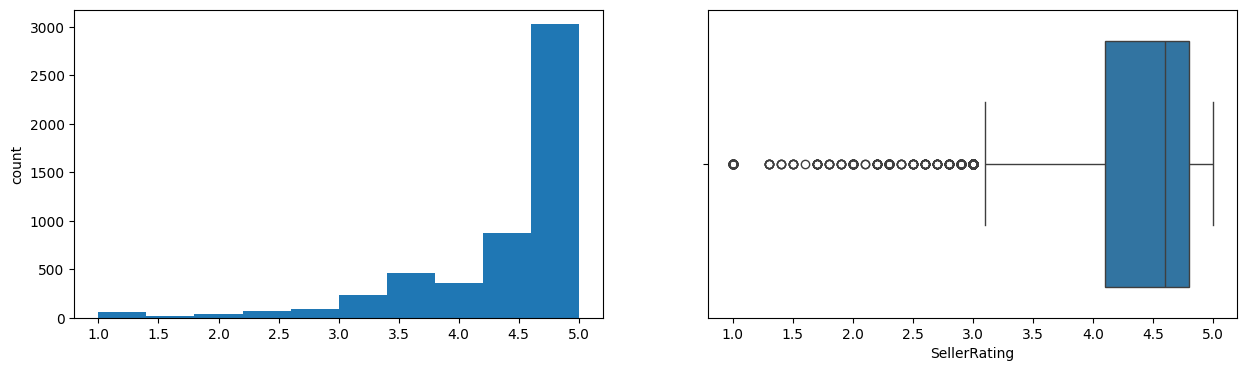

VehMileage
Skew : 0.0


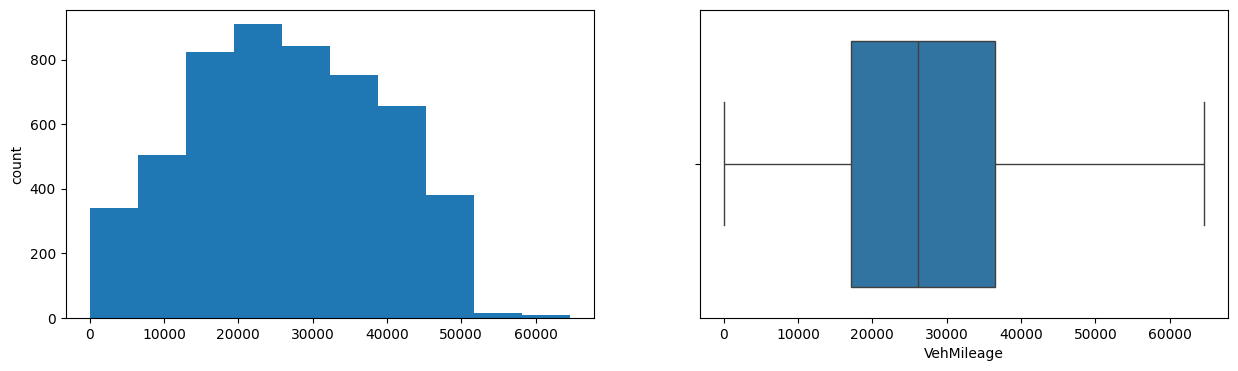

Dealer_Listing_Price
Skew : 0.65


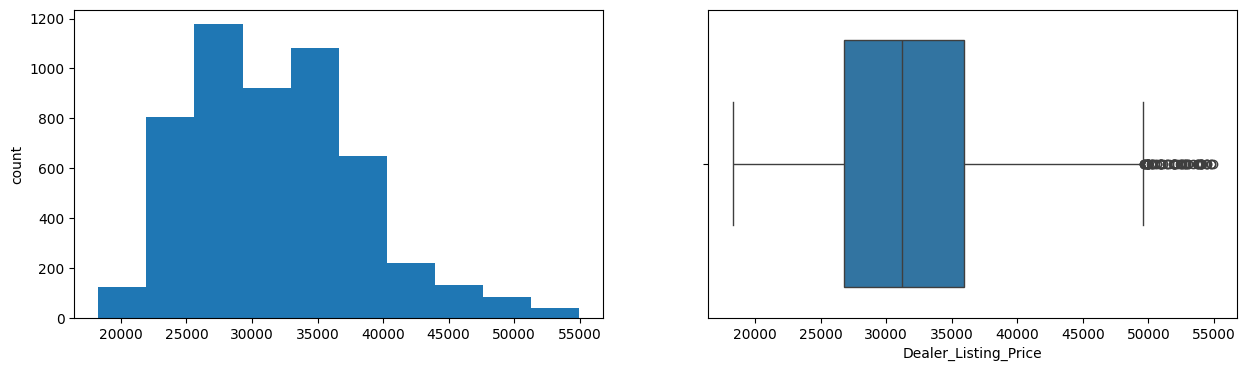

Car_Age
Skew : 0.38


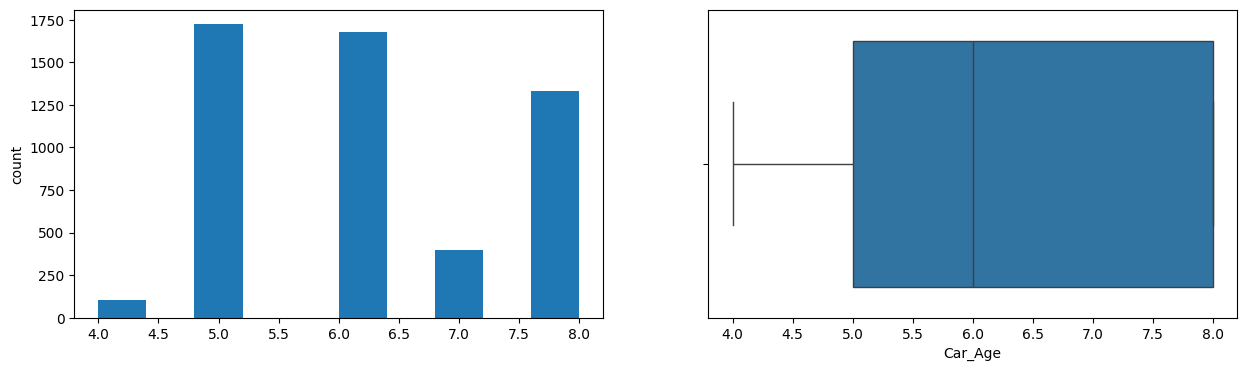

Accident
Skew : 2.6


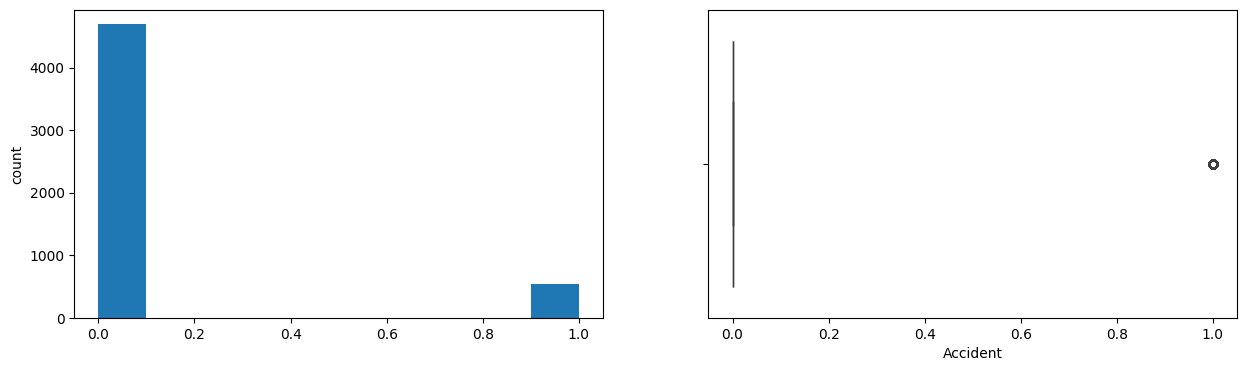

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

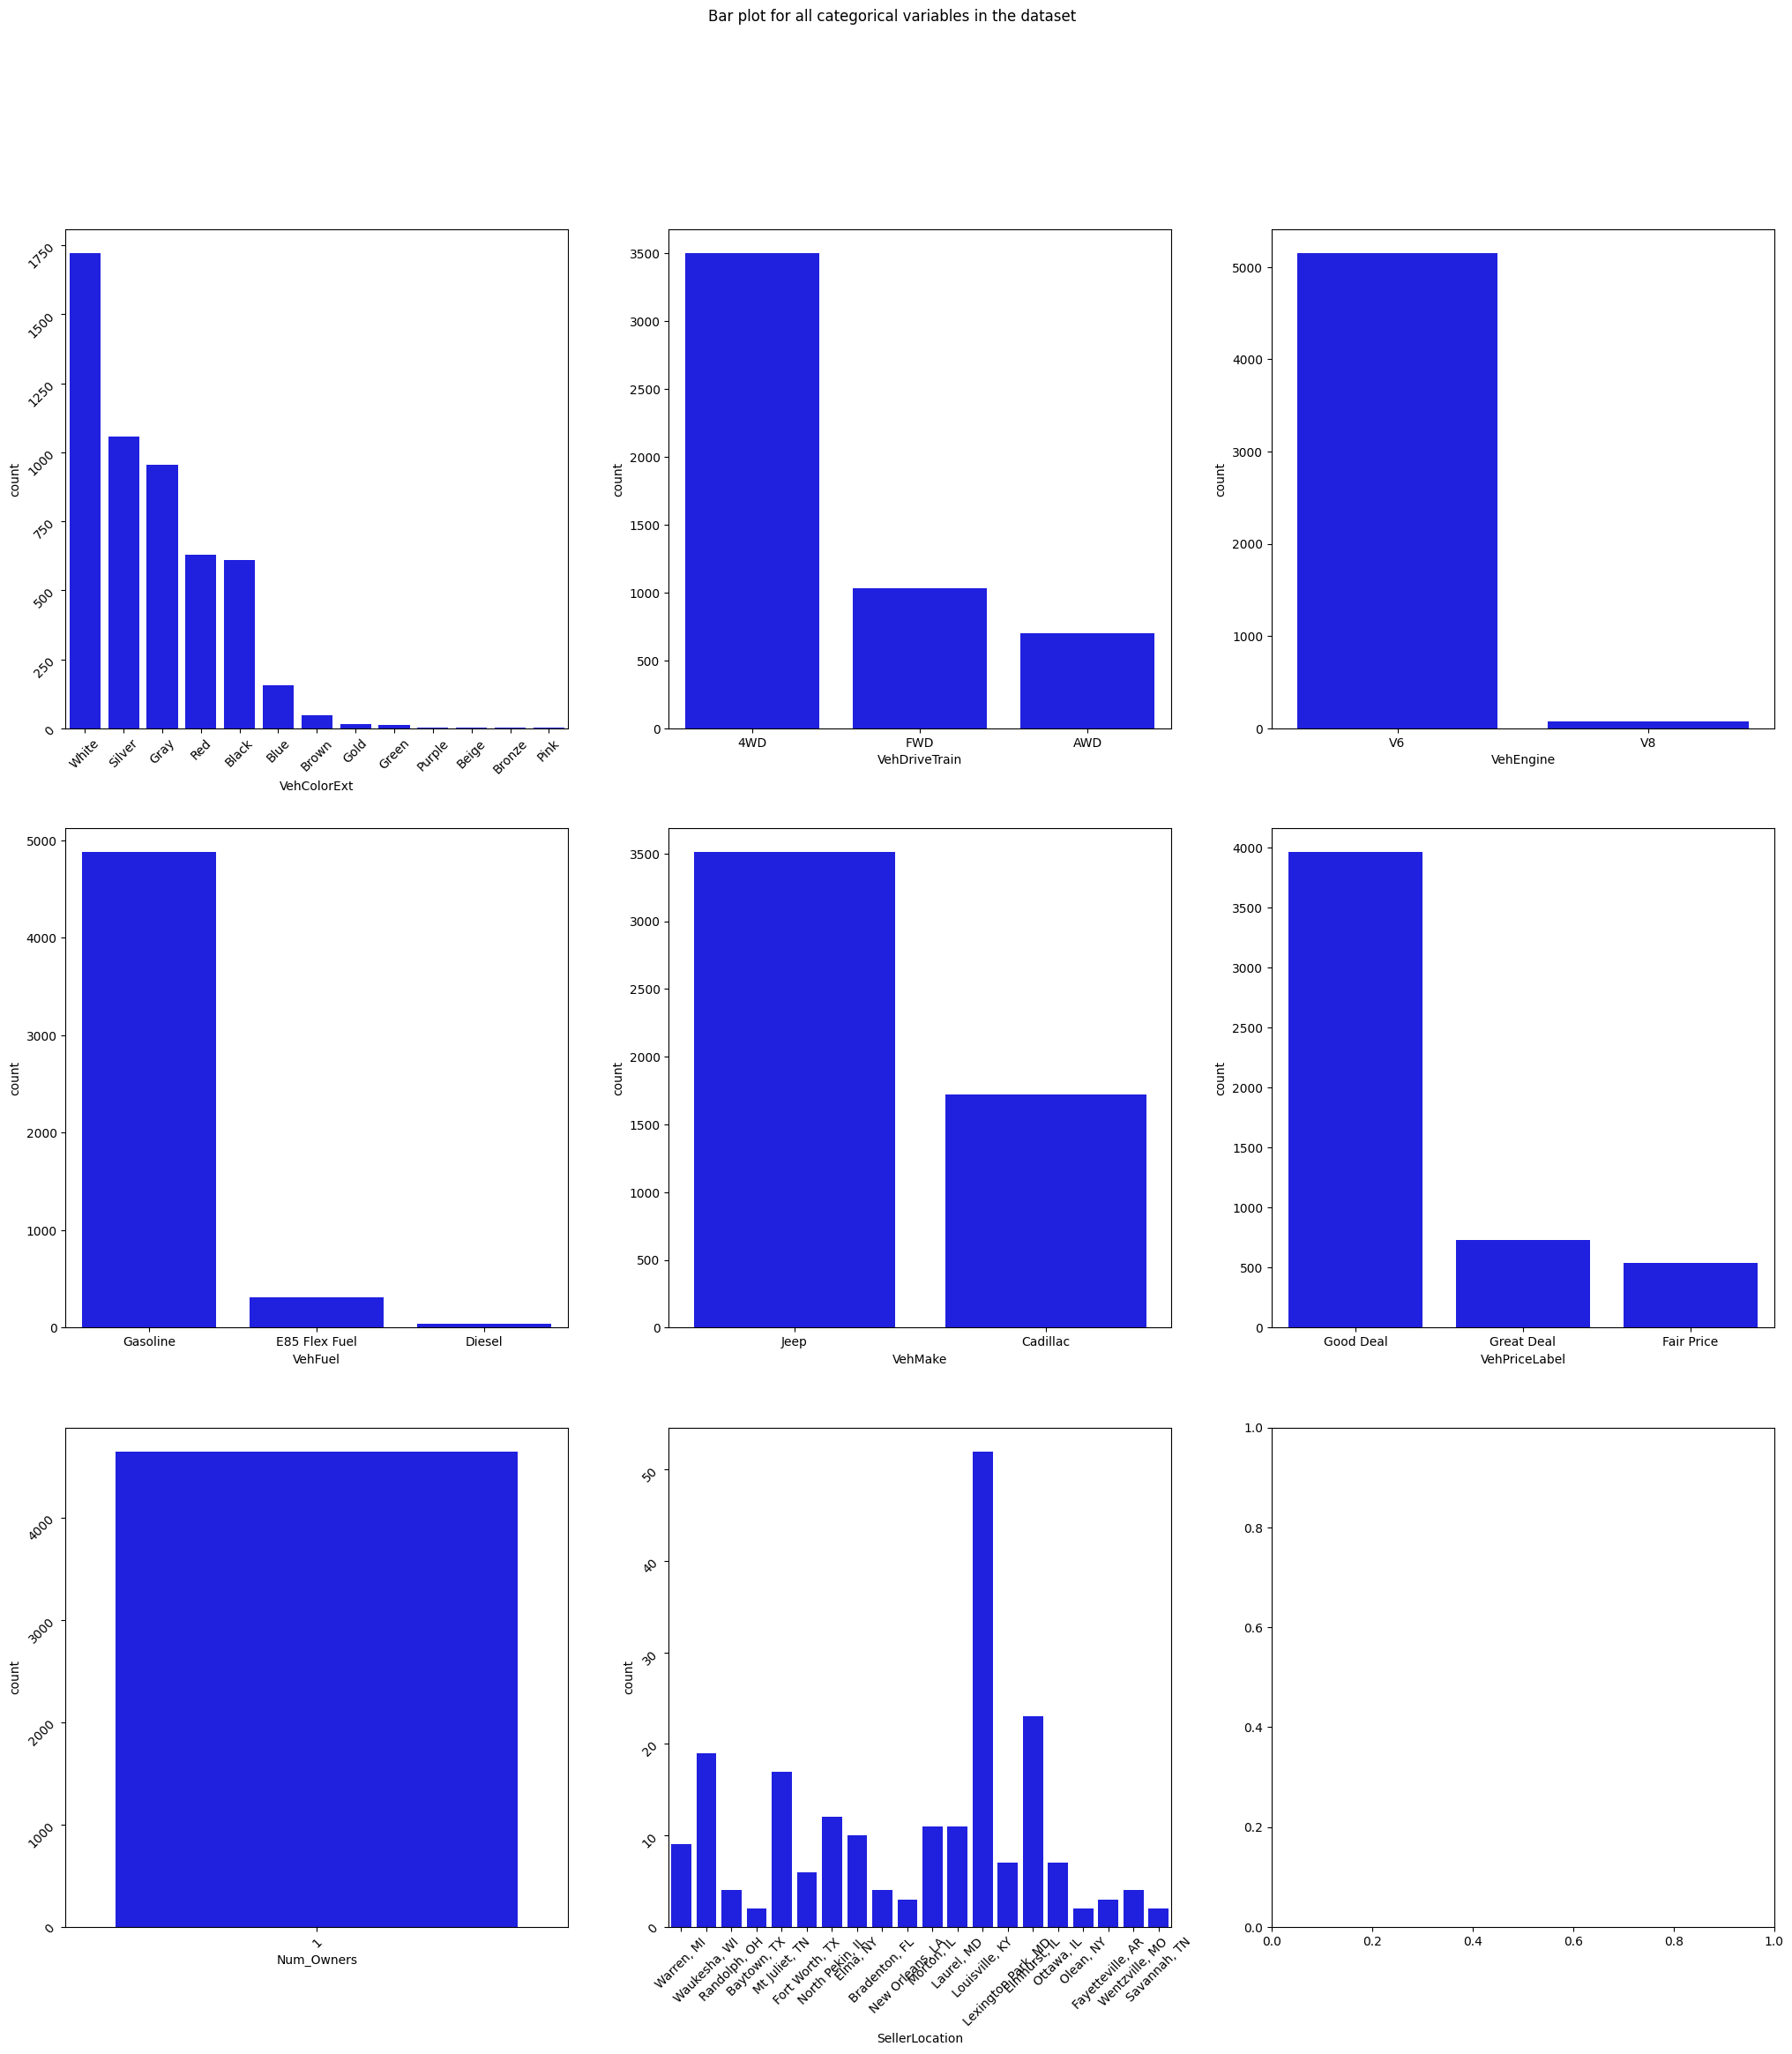

In [23]:
fig, axes = plt.subplots(3, 3, figsize = (25,25))
# ['VehColorExt', 'VehDriveTrain', 'VehEngine', 'VehFuel', 'VehMake',
#        'VehPriceLabel', 'VehTransmission', 'Vehicle_Trim', 'SellerLocation',
#        'Num_Owners']
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'VehColorExt', data = df, color = 'blue', 
              order = df['VehColorExt'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'VehDriveTrain', data = df, color = 'blue', 
              order = df['VehDriveTrain'].value_counts().index);
sns.countplot(ax = axes[0, 2], x = 'VehEngine', data = df, color = 'blue', 
              order = df['VehEngine'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'VehFuel', data = df, color = 'blue', 
              order = df['VehFuel'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'VehMake', data = df, color = 'blue', 
              order = df['VehMake'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 2], x = 'VehPriceLabel', data = df, color = 'blue', 
              order = df['VehPriceLabel'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Num_Owners', data = df, color = 'blue',
              order = df['Num_Owners'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'SellerLocation', data = df, color = 'blue',
              order = df['SellerLocation'].head(20).value_counts().index);
# sns.countplot(ax = axes[2, 2], x = 'Vehicle_Trim', data = df, color = 'blue',
#               order = df['Vehicle_Trim'].value_counts().index);
axes[0][0].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=45);
axes[2][1].tick_params(labelrotation=45);
# axes[2][2].tick_params(labelrotation=45);


# axes[3][3].tick_params(labelrotation=90);

<class 'pandas.core.frame.DataFrame'>
Index: 5233 entries, 3287 to 8620012
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SellerRating              5233 non-null   float64
 1   VehColorExt               5222 non-null   object 
 2   VehDriveTrain             5233 non-null   object 
 3   VehEngine                 5233 non-null   object 
 4   VehFuel                   5226 non-null   object 
 5   VehMake                   5233 non-null   object 
 6   VehMileage                5233 non-null   float64
 7   VehPriceLabel             5233 non-null   object 
 8   Dealer_Listing_Price      5233 non-null   float64
 9   Car_Age                   5233 non-null   int64  
 10  SellerLocation            5233 non-null   object 
 11  Num_Owners                5233 non-null   object 
 12  Accident                  5233 non-null   int64  
 13  VehMileage_log            5233 non-null   float64
 14  Dealer_

/var/folders/2l/j9sk8pns20q7yqf2ndbpmrq80000gp/T/ipykernel_52412/341883166.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["VehMileage_log"], axlabel="VehMileage_log");


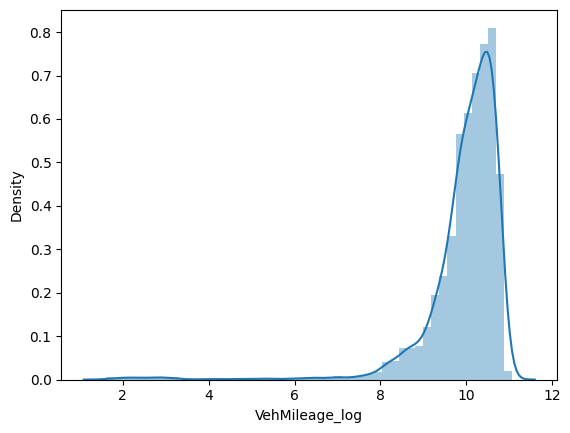

In [24]:
import numpy as np

# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

log_transform(df,['VehMileage','Dealer_Listing_Price'])

#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["VehMileage_log"], axlabel="VehMileage_log");


/var/folders/2l/j9sk8pns20q7yqf2ndbpmrq80000gp/T/ipykernel_52412/1941403889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Dealer_Listing_Price_log"], axlabel="Dealer_Listing_Price_log");


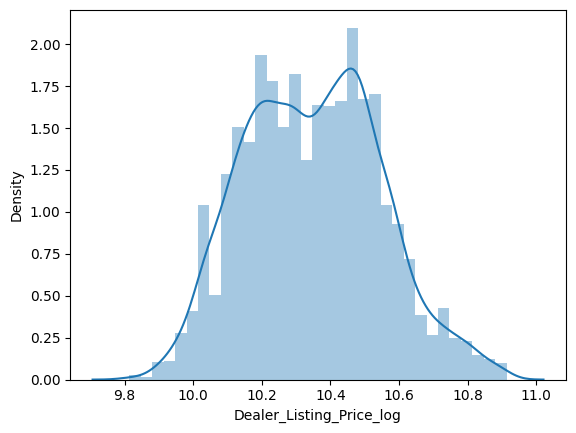

In [25]:
#Log transformation of the feature 'Price'
sns.distplot(df["Dealer_Listing_Price_log"], axlabel="Dealer_Listing_Price_log");

<Figure size 1300x1700 with 0 Axes>

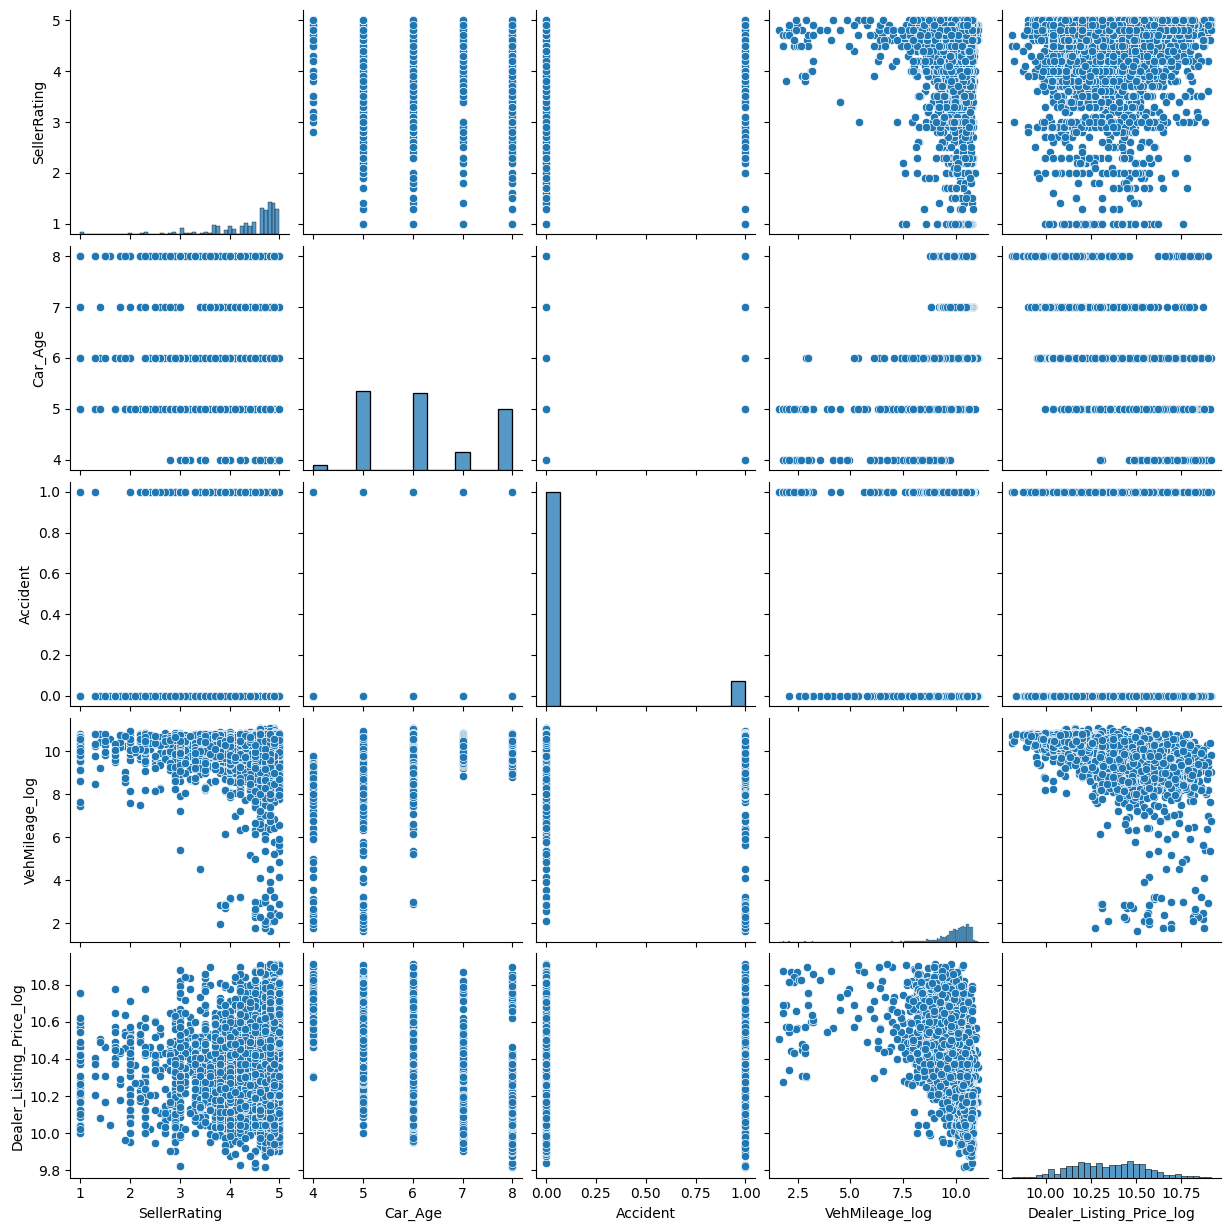

In [26]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['VehMileage','Dealer_Listing_Price'],axis=1))
plt.show()

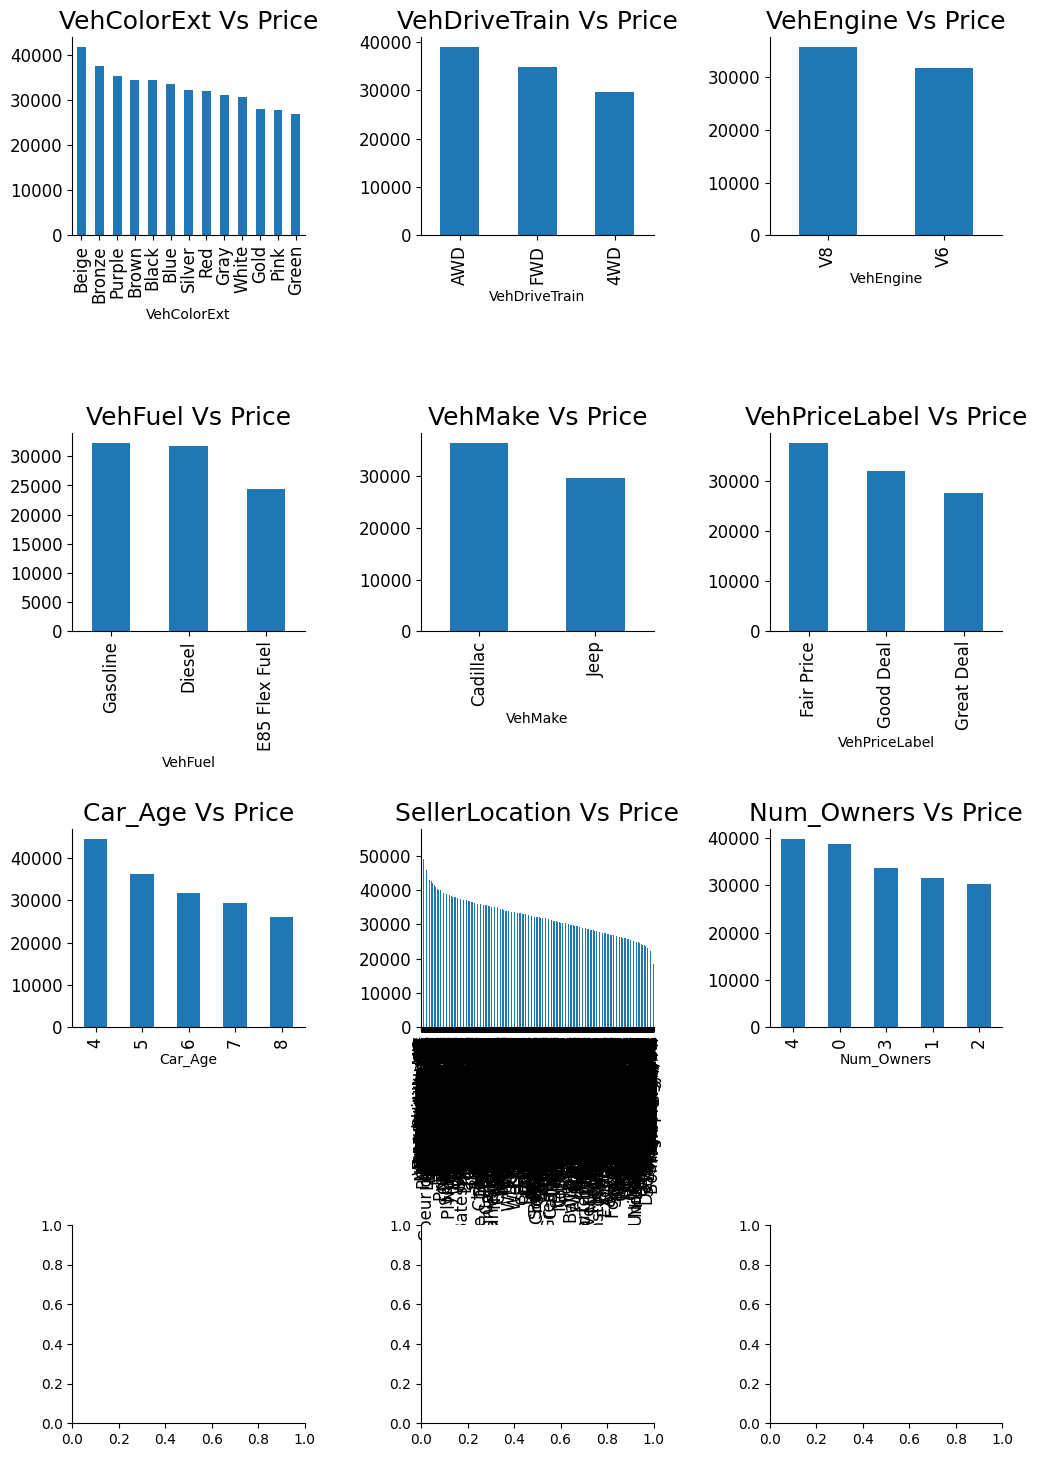

In [28]:
# ['VehColorExt', 'VehDriveTrain', 'VehEngine', 'VehFuel', 'VehMake',
#        'VehPriceLabel', 'VehTransmission', 'Vehicle_Trim', 'SellerLocation',
#        'Num_Owners']

fig, axarr = plt.subplots(4, 3, figsize=(12, 18))
df.groupby('VehColorExt')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("VehColorExt Vs Price", fontsize=18)
df.groupby('VehDriveTrain')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("VehDriveTrain Vs Price", fontsize=18)
df.groupby('VehEngine')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][2], fontsize=12)
axarr[0][2].set_title("VehEngine Vs Price", fontsize=18)
df.groupby('VehFuel')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("VehFuel Vs Price", fontsize=18)
df.groupby('VehMake')['Dealer_Listing_Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("VehMake Vs Price", fontsize=18)
df.groupby('VehPriceLabel')['Dealer_Listing_Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][2], fontsize=12)
axarr[1][2].set_title("VehPriceLabel Vs Price", fontsize=18)
df.groupby('Car_Age')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Car_Age Vs Price", fontsize=18)
df.groupby('SellerLocation')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("SellerLocation Vs Price", fontsize=18)
df.groupby('Num_Owners')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][2], fontsize=12)
axarr[2][2].set_title("Num_Owners Vs Price", fontsize=18)
# df.groupby('Vehicle_Trim')['Dealer_Listing_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
# axarr[3][0].set_title("Vehicle_Trim Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

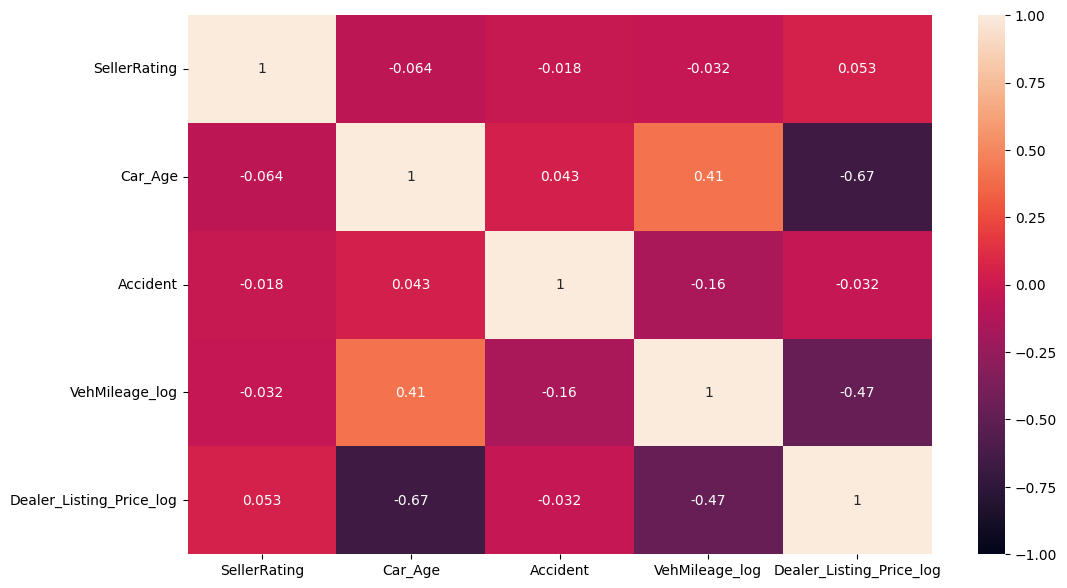

In [29]:
plt.figure(figsize=(12, 7))
# Grab only numberical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_num.drop(['VehMileage','Dealer_Listing_Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()